In [3]:
import pandas as pd

In [4]:
pd.reset_option("display.max_columns",None)
pd.set_option("display.width", 1000000000)

In [5]:
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
pd.set_option("display.max_colwidth", None)

df = pd.read_csv("dataset.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
X=df.drop(columns=["Churn"])
Y=df["Churn"]

In [8]:
X.duplicated().value_counts()

False    7043
Name: count, dtype: int64

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
import seaborn as sns  
import matplotlib.pyplot as plt

In [11]:
numeric_df = df.select_dtypes(include=['number'])

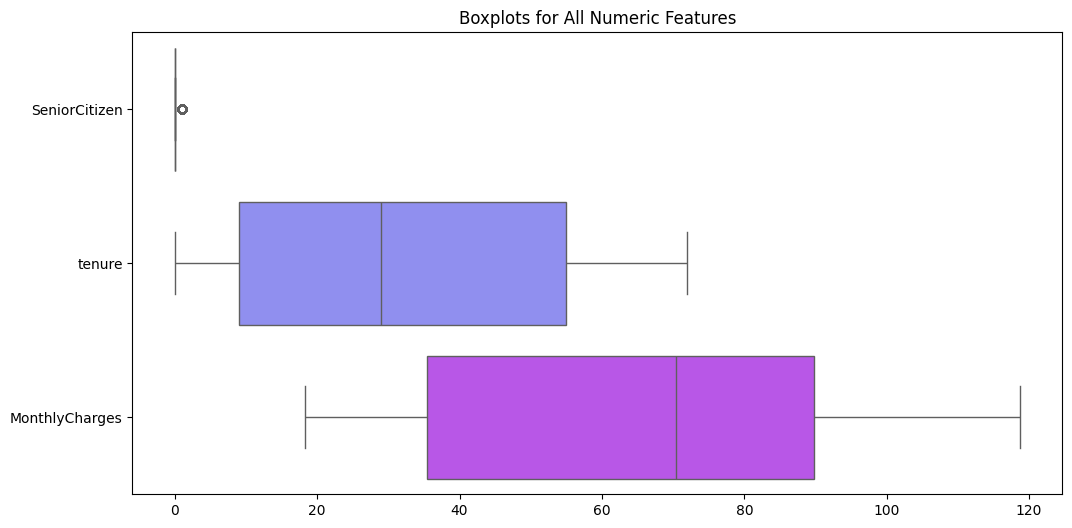

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df, orient="h", palette="cool")
plt.title("Boxplots for All Numeric Features")
plt.show()


**CustomerID** is of no use so be will going to drop this 

In [13]:
X=df.drop(columns=["customerID"])
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


now we are going to apply feature selection on ourinput features
1)**Droping Constant Features**-We will drop constant features with the help of sklearn's  varience.treshold algorithmm which apply on the input features which have low varince

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
lb=LabelEncoder()
a=[x for x in X.columns if X[x].isin(["Yes","No","Male","Female"]).all()]
print(a)

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


now lwts move to the encoding of the dataset

In [16]:
for i in a:
    X[i]=lb.fit_transform(X[i])
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [17]:
X["OnlineSecurity"].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [18]:
X["OnlineBackup"].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [19]:
X["DeviceProtection"].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [20]:
X["TechSupport"].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [21]:
X["StreamingTV"].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [22]:
(X["StreamingMovies"]==X["StreamingTV"]).value_counts()

True     5484
False    1559
Name: count, dtype: int64

In [23]:
X["StreamingMovies"].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [24]:
X=pd.get_dummies(X,columns=["MultipleLines","InternetService","Contract","PaymentMethod","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"])

In [25]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,1,0,1,29.85,29.85,0,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False
1,1,0,0,0,34,1,0,56.95,1889.5,0,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False
2,1,0,0,0,2,1,1,53.85,108.15,1,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False
3,1,0,0,0,45,0,0,42.30,1840.75,0,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,True,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False


In [26]:
X["No internet service"]=X["DeviceProtection_No internet service"]
a=["OnlineSecurity_No internet service","OnlineBackup_No internet service","DeviceProtection_No internet service","TechSupport_No internet service","StreamingTV_No internet service","StreamingMovies_No internet service"]

In [27]:
for i in a:
    if((X[i]==X["No internet service"]).all()):
        X=X.drop(columns=[i])

In [28]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,No internet service
0,0,0,1,0,1,0,1,29.85,29.85,0,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,False
1,1,0,0,0,34,1,0,56.95,1889.5,0,True,False,False,True,False,False,False,True,False,False,False,False,True,False,True,True,False,False,True,True,False,True,False,True,False,False
2,1,0,0,0,2,1,1,53.85,108.15,1,True,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,True,True,False,True,False,True,False,True,False,False
3,1,0,0,0,45,0,0,42.30,1840.75,0,False,True,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,True,True,False,True,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,True,False,False,False,True,False,True,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False


In [29]:
a=[x for x in X.columns if X[x].dtype==bool]
print(a)

['MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes', 'No internet service']


In [30]:
for i in a:
    X[i]=lb.fit_transform(X[i])
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,No internet service
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [31]:
X["MultipleLines_No"].value_counts()

MultipleLines_No
0    3653
1    3390
Name: count, dtype: int64

In [32]:
duplicate=X.columns[X.T.duplicated()]
print(duplicate)

Index(['No internet service'], dtype='object')


In [33]:
X=X.drop(columns=['No internet service'])
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   object 
 9   Churn                                    7043 non-null   int64  
 10  MultipleLines_No                         7043 no

In [36]:
type(X)

pandas.core.frame.DataFrame

In [37]:
#invalid_mask = pd.to_numeric(X["TotalCharges"], errors='coerce').isna()
#X.loc[invalid_mask, "TotalCharges"].apply(repr)

In [38]:
X["TotalCharges"] = pd.to_numeric(X["TotalCharges"], errors='coerce')
X = X.dropna(subset=["TotalCharges"])


In [39]:
type(X)

pandas.core.frame.DataFrame

In [40]:

X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [41]:
scaler=MinMaxScaler()
X_scalled=scaler.fit_transform(X)
X=pd.DataFrame(X_scalled,columns=X.columns)

In [42]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.115423,0.001275,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.385075,0.215867,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.354229,0.010310,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.0,0.239303,0.210241,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.521891,0.015330,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [43]:
X.to_csv("cleaned.csv")

In [44]:
X1=X

In [45]:
X1.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.011902,-0.013779,0.000048,-0.008545,0.004335,0.007515,-0.008883,0.007584,-0.011189,0.004745,-0.003251,0.007755,-0.003603,-0.015973,0.001632,0.000844,0.013199,0.010859,-0.016328,0.008605,-0.013093,-0.003163,-0.000807,0.003815,-0.008507,0.003088,-0.007124,0.006078,-0.010105
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.102411,0.150541,-0.136377,-0.008392,0.142996,-0.108276,0.254923,-0.182519,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987,0.185145,-0.038576,0.087539,0.066663,0.094403,0.059514,0.205254,-0.060577,0.048664,0.105445,0.034196,0.119842
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,0.319072,-0.149982,-0.130028,-0.018397,0.142561,-0.001043,0.001235,-0.000286,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948,-0.129394,0.143346,-0.135626,0.141849,-0.146702,0.153556,-0.108875,0.120206,-0.123394,0.124483,-0.117488,0.118108
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.163128,0.023388,0.001078,-0.024307,0.051593,-0.164101,0.138383,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448,-0.186979,0.080786,-0.137421,0.023639,-0.128053,0.013900,-0.171164,0.063053,-0.099912,-0.016499,-0.078245,-0.038375
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,0.825880,-0.354049,-0.323891,-0.007877,0.332399,0.013786,0.017930,-0.037529,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181,-0.265987,0.328297,-0.314769,0.361138,-0.314820,0.361520,-0.264363,0.325288,-0.246814,0.280264,-0.252890,0.285402
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.113008,0.011691,0.315218,-1.000000,0.279530,-0.452255,0.290183,0.171817,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463,-0.058546,-0.091676,-0.092579,-0.052133,-0.075421,-0.070076,-0.055102,-0.095138,-0.123159,-0.021383,-0.111273,-0.033477
PaperlessBilling,-0.011902,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.157830,0.191454,-0.151974,-0.016696,0.163746,-0.063390,0.326470,-0.320592,0.168296,-0.052278,-0.146281,-0.017469,-0.013726,0.208427,-0.203981,0.267592,-0.004051,0.144218,0.127056,0.166253,0.104079,0.229875,0.037536,0.046715,0.224241,0.058987,0.211583
MonthlyCharges,-0.013779,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.651065,0.192858,-0.338514,-0.248033,0.490912,-0.161368,0.787195,-0.763191,0.058933,0.004810,-0.073256,0.042410,0.030055,0.271117,-0.376568,0.360220,0.296447,0.210126,0.441529,0.171057,0.482607,0.321267,0.338301,0.016015,0.629668,0.017271,0.627235
TotalCharges,0.000048,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484,-0.396765,-0.113008,0.469042,-0.052190,0.360769,-0.374878,-0.446776,0.170569,0.358036,0.186119,0.182663,-0.060436,-0.294708,-0.064515,0.412619,-0.177633,0.510100,-0.189485,0.522881,-0.084270,0.432868,-0.197144,0.515709,-0.202605,0.519867
Churn,-0.008545,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192858,-0.199484,1.000000,-0.032654,-0.011691,0.040033,-0.124141,0.307463,-0.227578,0.404565,-0.178225,-0.301552,-0.118136,-0.134687,0.301455,-0.090773,0.342235,-0.171270,0.267595,-0.082307,0.252056,-

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(X1.corr())

In [ ]:
print(0)